**1. Download Dataset**

In [1]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: d:\AIO2024\module_5\week_1\titanic_modified_dataset.csv

  0%|          | 0.00/25.9k [00:00<?, ?B/s]
100%|██████████| 25.9k/25.9k [00:00<00:00, 1.01MB/s]


**2. Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**3. Read data**

In [3]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


**4. Split feature and target**

In [4]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

**5. Add bias to X**

In [5]:
intercept =np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

**6. Train, val, test split**

In [6]:
val_size = 0.2
test_size = 0.125
random_state = 42
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

**7. Normalization**

In [7]:
# Don't normalize the intercept term
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

**8. Important functions**

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

In [10]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
    loss = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return loss

In [11]:
def compute_gradient(X, y, y_hat):
    gradient = np.dot(X.T, (y_hat - y)) / y.size
    return gradient

In [12]:
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

In [13]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

**9. Declare hyperparameters and initialize weights**

In [14]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

**10. Training model**

In [15]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i + batch_size]
        y_i = y_train[i: i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_batch_accs.append(compute_accuracy(X_i, y_i, theta))

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_batch_accs.append(compute_accuracy(X_val, y_val, theta))

    train_losses.append(np.mean(train_batch_losses))
    train_accs.append(np.mean(train_batch_accs))
    val_losses.append(np.mean(val_batch_losses))
    val_accs.append(np.mean(val_batch_accs))

    print(f'\nEpoch {epoch + 1}/{epochs} \tTraining loss: {train_losses[-1]:.4f} \tValidation loss: {val_losses[-1]:.4f}')


Epoch 1/100 	Training loss: 0.8372 	Validation loss: 0.8739

Epoch 2/100 	Training loss: 0.7880 	Validation loss: 0.8276

Epoch 3/100 	Training loss: 0.7461 	Validation loss: 0.7875

Epoch 4/100 	Training loss: 0.7103 	Validation loss: 0.7525

Epoch 5/100 	Training loss: 0.6796 	Validation loss: 0.7218

Epoch 6/100 	Training loss: 0.6532 	Validation loss: 0.6948

Epoch 7/100 	Training loss: 0.6304 	Validation loss: 0.6709

Epoch 8/100 	Training loss: 0.6107 	Validation loss: 0.6497

Epoch 9/100 	Training loss: 0.5936 	Validation loss: 0.6308

Epoch 10/100 	Training loss: 0.5787 	Validation loss: 0.6139

Epoch 11/100 	Training loss: 0.5657 	Validation loss: 0.5988

Epoch 12/100 	Training loss: 0.5543 	Validation loss: 0.5852

Epoch 13/100 	Training loss: 0.5443 	Validation loss: 0.5730

Epoch 14/100 	Training loss: 0.5355 	Validation loss: 0.5619

Epoch 15/100 	Training loss: 0.5278 	Validation loss: 0.5519

Epoch 16/100 	Training loss: 0.5209 	Validation loss: 0.5429

Epoch 17/100 	Tr

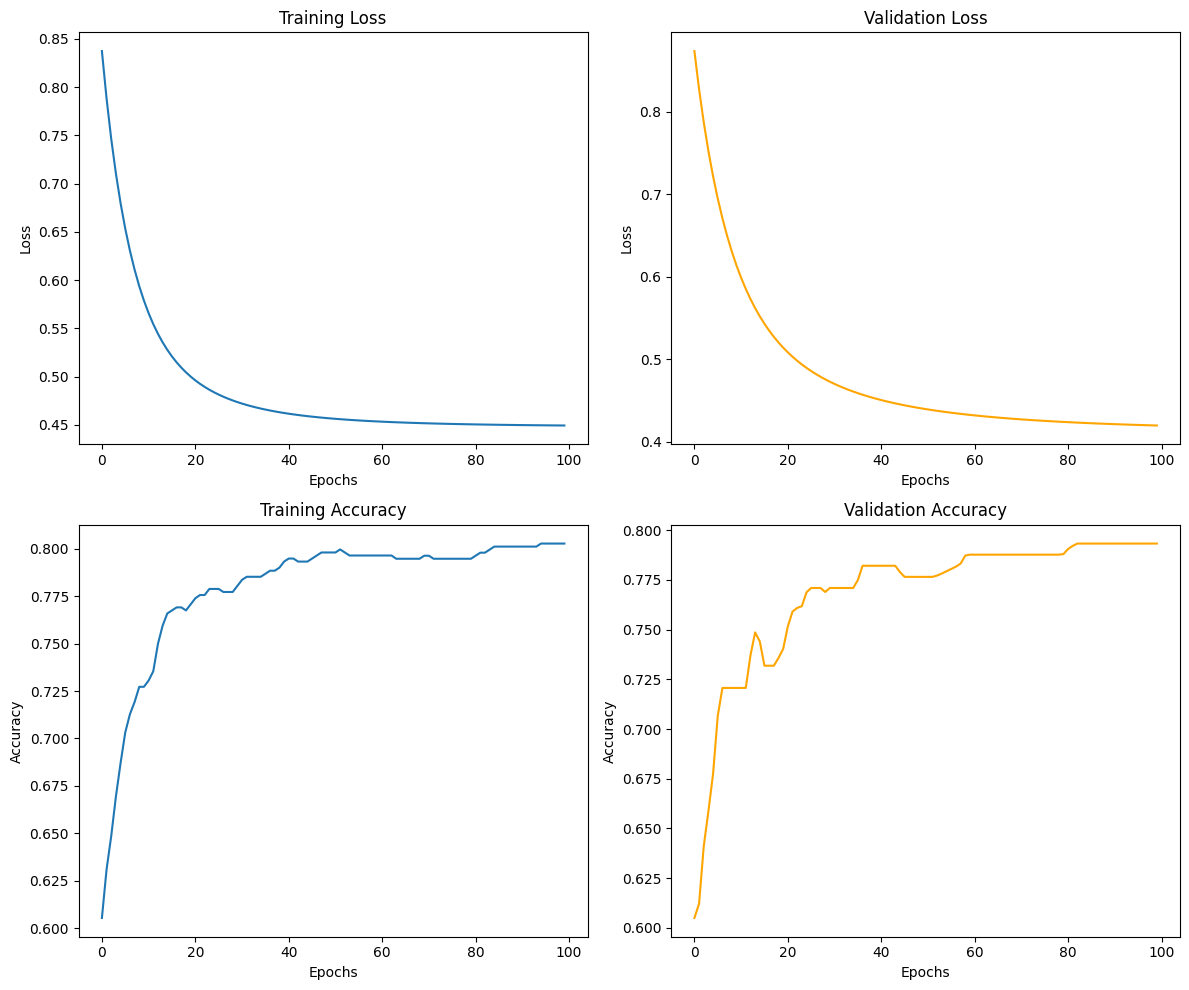

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, label='Training loss')
ax[0, 0].set(xlabel='Epochs', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, label='Validation loss', color='orange')
ax[0, 1].set(xlabel='Epochs', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, label='Training accuracy')
ax[1, 0].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, label='Validation accuracy', color='orange')
ax[1, 1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()


**11. Evaluation model**

In [17]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f'Evaluation on validation and test set:')
print(f'Validation set accuracy: {val_set_acc:.4f}')
print(f'Test set accuracy: {test_set_acc:.4f}')

Evaluation on validation and test set:
Validation set accuracy: 0.7933
Test set accuracy: 0.8427
